In [15]:
 
#Daily Data Seasonal Division
import os
import pandas as pd

# Define the base path and cities
base_path = r'C:\Users\Lenovo\Downloads\code 1 somya'

data_folder = os.path.join(base_path, 'Dailydata')  # Updated to Resultpy/Dailydata
cities = ['Delhi', 'Mumbai', 'Chennai', 'Bengaluru', 'Hyderabad']
graph_folder = os.path.join(base_path, 'Graph', 'Seasonal_DD')  # Output folder

# Create the directory structure if it doesn't exist
if not os.path.exists(graph_folder):
    os.makedirs(graph_folder)

# Create the directory structure for each city and season
seasons = ['Winter', 'Pre Monsoon', 'Monsoon', 'Post Monsoon']
for city in cities:
    city_folder = os.path.join(graph_folder, city)
    if not os.path.exists(city_folder):
        os.makedirs(city_folder)
    for season in seasons:
        season_folder = os.path.join(city_folder, season)
        if not os.path.exists(season_folder):
            os.makedirs(season_folder)

# Function to filter and save data for a specific season
def filter_and_save_data(city, file_name, df, output_folder, season):
    print(f"Processing file: {file_name} for city: {city}, season: {season}")

    # Ensure 'From Date' is a datetime object
    df['From Date'] = pd.to_datetime(df['From Date'], errors='coerce')

    # Drop rows with invalid 'From Date'
    initial_rows = len(df)
    df = df.dropna(subset=['From Date'])
    valid_rows = len(df)

    if initial_rows != valid_rows:
        print(f"Warning: {initial_rows - valid_rows} rows with invalid 'From Date' dropped.")

    # Define additional columns for filtering
    df['Month'] = df['From Date'].dt.month
    df['Year'] = df['From Date'].dt.year

    # Define the year range
    start_year = 2014
    end_year = 2023

    # Filter data for the specified year range
    df_last_10_years = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    print(f"Data filtered for years {start_year} to {end_year}. Rows remaining: {len(df_last_10_years)}")

    # Filter data for the specific season
    if season == 'Winter':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 12) | (df_last_10_years['Month'] == 1) | (df_last_10_years['Month'] == 2)]
    elif season == 'Pre Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 3) | (df_last_10_years['Month'] == 4) | (df_last_10_years['Month'] == 5)]
    elif season == 'Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 6) | (df_last_10_years['Month'] == 7) | (df_last_10_years['Month'] == 8)]
    elif season == 'Post Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 9) | (df_last_10_years['Month'] == 10) | (df_last_10_years['Month'] == 11)]

    if not season_data.empty:
        season_data = season_data.drop(columns=['Month', 'Year'], errors='ignore')
        file_base_name = os.path.splitext(file_name)[0]
        output_file = os.path.join(output_folder, season, f'{file_base_name}_{season}.csv')
        season_data.to_csv(output_file, index=False)
        print(f"Saved {season} data for {file_name} in city {city} with {len(season_data)} rows")
    else:
        print(f"No data found for season {season}") 
# Process data for each city
for city in cities:
    city_dir = os.path.join(data_folder, city)

    # Process each file in the city folder
    for file_name in os.listdir(city_dir):
        file_path = os.path.join(city_dir, file_name)
        if file_name.endswith('.csv'):
            try:
                df = pd.read_csv(file_path)

                # Filter and save data for each season
                for season in seasons:
                    filter_and_save_data(city, file_name, df, os.path.join(graph_folder, city), season)

                print(f"Seasonal data for '{file_name}' in city '{city}' saved in '{os.path.join(graph_folder, city)}'.")
            except Exception as e:
                print(f"Error processing '{file_path}': {e}")

print("Processing completed and files saved.")


Processing completed and files saved.


In [19]:
 
#Daily Data Seasonal Division
import os
import pandas as pd

# Define the base path and cities
base_path = r'C:\Users\Lenovo\Downloads\code 1 somya'

data_folder = os.path.join(base_path, 'Dailydata')  # Updated to Resultpy/Dailydata
cities = ['Delhi', 'Mumbai', 'Chennai', 'Bengaluru', 'Hyderabad']
graph_folder = os.path.join(base_path, 'Graph', 'Seasonal_DD')  # Output folder

# Create the directory structure if it doesn't exist
if not os.path.exists(graph_folder):
    os.makedirs(graph_folder)

# Create the directory structure for each city and season
seasons = ['Winter', 'Pre Monsoon', 'Monsoon', 'Post Monsoon']
for city in cities:
    city_folder = os.path.join(graph_folder, city)
    if not os.path.exists(city_folder):
        os.makedirs(city_folder)
    for season in seasons:
        season_folder = os.path.join(city_folder, season)
        if not os.path.exists(season_folder):
            os.makedirs(season_folder)

# Function to filter and save data for a specific season
def filter_and_save_data(city, file_name, df, output_folder, season):
    print(f"Processing file: {file_name} for city: {city}, season: {season}")

    # Ensure 'From Date' is a datetime object
    df['From Date'] = pd.to_datetime(df['From Date'], errors='coerce')

    # Drop rows with invalid 'From Date'
    initial_rows = len(df)
    df = df.dropna(subset=['From Date'])
    valid_rows = len(df)

    if initial_rows != valid_rows:
        print(f"Warning: {initial_rows - valid_rows} rows with invalid 'From Date' dropped.")

    # Define additional columns for filtering
    df['Month'] = df['From Date'].dt.month
    df['Year'] = df['From Date'].dt.year

    # Define the year range
    start_year = 2014
    end_year = 2023

    # Filter data for the specified year range
    df_last_10_years = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    print(f"Data filtered for years {start_year} to {end_year}. Rows remaining: {len(df_last_10_years)}")

    # Filter data for the specific season
    if season == 'Winter':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 12) | (df_last_10_years['Month'] == 1) | (df_last_10_years['Month'] == 2)]
    elif season == 'Pre Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 3) | (df_last_10_years['Month'] == 4) | (df_last_10_years['Month'] == 5)]
    elif season == 'Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 6) | (df_last_10_years['Month'] == 7) | (df_last_10_years['Month'] == 8)]
    elif season == 'Post Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 9) | (df_last_10_years['Month'] == 10) | (df_last_10_years['Month'] == 11)]

    if not season_data.empty:
        season_data = season_data.drop(columns=['Month', 'Year'], errors='ignore')
        file_base_name = os.path.splitext(file_name)[0]
        output_file = os.path.join(output_folder, season, f'{file_base_name}_{season}.csv')
        season_data.to_csv(output_file, index=False)
        print(f"Saved {season} data for {file_name} in city {city} with {len(season_data)} rows")
    else:
        print(f"No data found for season {season}") 
# Process data for each city
for city in cities:
    city_dir = os.path.join(data_folder, city)

    # Process each file in the city folder
    for file_name in os.listdir(city_dir):
        file_path = os.path.join(city_dir, file_name)
        if file_name.endswith('.csv'):
            try:
                df = pd.read_csv(file_path)

                # Filter and save data for each season
                for season in seasons:
                    filter_and_save_data(city, file_name, df, os.path.join(graph_folder, city), season)

                print(f"Seasonal data for '{file_name}' in city '{city}' saved in '{os.path.join(graph_folder, city)}'.")
            except Exception as e:
                print(f"Error processing '{file_path}': {e}")

print("Processing completed and files saved.")



Processing completed and files saved.


In [23]:


2 of 63
Codes and Daily Data Link
Inbox

Somya Garg <somyagarg0309@gmail.com>
Attachments
Jan 2, 2025, 11:15 AM (1 day ago)
to me

https://drive.google.com/drive/folders/1DiI-kVJmtUc2bDFi2l3Nev_dgjSSztOu?usp=drive_link
 2 Attachments
  •  Scanned by Gmail
#install kaggle
!pip install -q kaggle
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')




from google.colab import files
files.upload()


#create a kaggle folder
!mkdir ~/.kaggle


#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/


# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d abhisheksjha/time-series-air-quality-data-of-india-2010-2023

! unzip time-series-air-quality-data-of-india-2010-2023.zip


!pip install pandas numpy scipy pymannkendall


#Daily Data Seasonal Division
import os
import pandas as pd

# Define the base path and cities
base_path = '/content/drive/My Drive/Resultpy'
data_folder = os.path.join(base_path, 'Dailydata')  # Updated to Resultpy/Dailydata
cities = ['Delhi', 'Mumbai', 'Chennai', 'Bengaluru', 'Hyderabad']
graph_folder = os.path.join(base_path, 'Graph', 'Seasonal_DD')  # Output folder

# Create the directory structure if it doesn't exist
if not os.path.exists(graph_folder):
    os.makedirs(graph_folder)

# Create the directory structure for each city and season
seasons = ['Winter', 'Pre Monsoon', 'Monsoon', 'Post Monsoon']
for city in cities:
    city_folder = os.path.join(graph_folder, city)
    if not os.path.exists(city_folder):
        os.makedirs(city_folder)
    for season in seasons:
        season_folder = os.path.join(city_folder, season)
        if not os.path.exists(season_folder):
            os.makedirs(season_folder)

# Function to filter and save data for a specific season
def filter_and_save_data(city, file_name, df, output_folder, season):
    print(f"Processing file: {file_name} for city: {city}, season: {season}")

    # Ensure 'From Date' is a datetime object
    df['From Date'] = pd.to_datetime(df['From Date'], errors='coerce')

    # Drop rows with invalid 'From Date'
    initial_rows = len(df)
    df = df.dropna(subset=['From Date'])
    valid_rows = len(df)

    if initial_rows != valid_rows:
        print(f"Warning: {initial_rows - valid_rows} rows with invalid 'From Date' dropped.")

    # Define additional columns for filtering
    df['Month'] = df['From Date'].dt.month
    df['Year'] = df['From Date'].dt.year

    # Define the year range
    start_year = 2014
    end_year = 2023

    # Filter data for the specified year range
    df_last_10_years = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    print(f"Data filtered for years {start_year} to {end_year}. Rows remaining: {len(df_last_10_years)}")

    # Filter data for the specific season
    if season == 'Winter':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 12) | (df_last_10_years['Month'] == 1) | (df_last_10_years['Month'] == 2)]
    elif season == 'Pre Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 3) | (df_last_10_years['Month'] == 4) | (df_last_10_years['Month'] == 5)]
    elif season == 'Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 6) | (df_last_10_years['Month'] == 7) | (df_last_10_years['Month'] == 8)]
    elif season == 'Post Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 9) | (df_last_10_years['Month'] == 10) | (df_last_10_years['Month'] == 11)]

    if not season_data.empty:
        season_data = season_data.drop(columns=['Month', 'Year'], errors='ignore')
        file_base_name = os.path.splitext(file_name)[0]
        output_file = os.path.join(output_folder, season, f'{file_base_name}_{season}.csv')
        season_data.to_csv(output_file, index=False)
        print(f"Saved {season} data for {file_name} in city {city} with {len(season_data)} rows")
    else:
        print(f"No data found for season {season}")

# Process data for each city
for city in cities:
    city_dir = os.path.join(data_folder, city)

    # Process each file in the city folder
    for file_name in os.listdir(city_dir):
        file_path = os.path.join(city_dir, file_name)
        if file_name.endswith('.csv'):
            try:
                df = pd.read_csv(file_path)

                # Filter and save data for each season
                for season in seasons:
                    filter_and_save_data(city, file_name, df, os.path.join(graph_folder, city), season)

                print(f"Seasonal data for '{file_name}' in city '{city}' saved in '{os.path.join(graph_folder, city)}'.")
            except Exception as e:
                print(f"Error processing '{file_path}': {e}")

print("Processing completed and files saved.")

SyntaxError: invalid non-printable character U+202F (2709377249.py, line 7)

In [27]:
 
#install kaggle
!pip install -q kaggle
# Mount Google Drive 
from google.colab import drive
drive.mount('/content/drive') 
from google.colab import files
files.upload()  
#create a kaggle folder
!mkdir ~/.kaggle


#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/


# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d abhisheksjha/time-series-air-quality-data-of-india-2010-2023

! unzip time-series-air-quality-data-of-india-2010-2023.zip


!pip install pandas numpy scipy pymannkendall


#Daily Data Seasonal Division
import os
import pandas as pd

# Define the base path and cities
base_path = '/content/drive/My Drive/Resultpy'
data_folder = os.path.join(base_path, 'Dailydata')  # Updated to Resultpy/Dailydata
cities = ['Delhi', 'Mumbai', 'Chennai', 'Bengaluru', 'Hyderabad']
graph_folder = os.path.join(base_path, 'Graph', 'Seasonal_DD')  # Output folder

# Create the directory structure if it doesn't exist
if not os.path.exists(graph_folder):
    os.makedirs(graph_folder)

# Create the directory structure for each city and season
seasons = ['Winter', 'Pre Monsoon', 'Monsoon', 'Post Monsoon']
for city in cities:
    city_folder = os.path.join(graph_folder, city)
    if not os.path.exists(city_folder):
        os.makedirs(city_folder)
    for season in seasons:
        season_folder = os.path.join(city_folder, season)
        if not os.path.exists(season_folder):
            os.makedirs(season_folder)

# Function to filter and save data for a specific season
def filter_and_save_data(city, file_name, df, output_folder, season):
    print(f"Processing file: {file_name} for city: {city}, season: {season}")

    # Ensure 'From Date' is a datetime object
    df['From Date'] = pd.to_datetime(df['From Date'], errors='coerce')

    # Drop rows with invalid 'From Date'
    initial_rows = len(df)
    df = df.dropna(subset=['From Date'])
    valid_rows = len(df)

    if initial_rows != valid_rows:
        print(f"Warning: {initial_rows - valid_rows} rows with invalid 'From Date' dropped.")

    # Define additional columns for filtering
    df['Month'] = df['From Date'].dt.month
    df['Year'] = df['From Date'].dt.year

    # Define the year range
    start_year = 2014
    end_year = 2023

    # Filter data for the specified year range
    df_last_10_years = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    print(f"Data filtered for years {start_year} to {end_year}. Rows remaining: {len(df_last_10_years)}")

    # Filter data for the specific season
    if season == 'Winter':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 12) | (df_last_10_years['Month'] == 1) | (df_last_10_years['Month'] == 2)]
    elif season == 'Pre Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 3) | (df_last_10_years['Month'] == 4) | (df_last_10_years['Month'] == 5)]
    elif season == 'Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 6) | (df_last_10_years['Month'] == 7) | (df_last_10_years['Month'] == 8)]
    elif season == 'Post Monsoon':
        season_data = df_last_10_years[(df_last_10_years['Month'] == 9) | (df_last_10_years['Month'] == 10) | (df_last_10_years['Month'] == 11)]

    if not season_data.empty:
        season_data = season_data.drop(columns=['Month', 'Year'], errors='ignore')
        file_base_name = os.path.splitext(file_name)[0]
        output_file = os.path.join(output_folder, season, f'{file_base_name}_{season}.csv')
        season_data.to_csv(output_file, index=False)
        print(f"Saved {season} data for {file_name} in city {city} with {len(season_data)} rows")
    else:
        print(f"No data found for season {season}")

# Process data for each city
for city in cities:
    city_dir = os.path.join(data_folder, city)

    # Process each file in the city folder
    for file_name in os.listdir(city_dir):
        file_path = os.path.join(city_dir, file_name)
        if file_name.endswith('.csv'):
            try:
                df = pd.read_csv(file_path)

                # Filter and save data for each season
                for season in seasons:
                    filter_and_save_data(city, file_name, df, os.path.join(graph_folder, city), season)

                print(f"Seasonal data for '{file_name}' in city '{city}' saved in '{os.path.join(graph_folder, city)}'.")
            except Exception as e:
                print(f"Error processing '{file_path}': {e}")

print("Processing completed and files saved.")

ModuleNotFoundError: No module named 'google.colab'

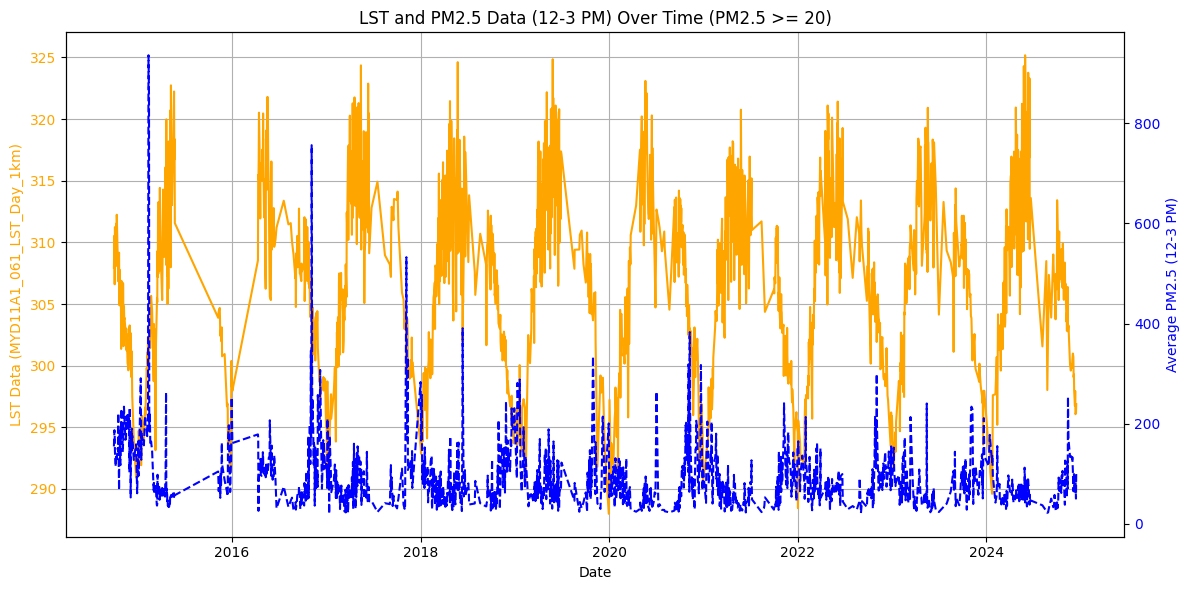

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the LST data
lst_file_path = r'C:\Users\Lenovo\Downloads\DILSHAD-MYD11A1-061-results.csv'  # Correct LST data file path
df_lst = pd.read_csv(lst_file_path)

# Ensure the columns are in the correct format for LST data
df_lst['Date'] = pd.to_datetime(df_lst['Date'], errors='coerce')

# Ensure LST values are numeric
df_lst['MYD11A1_061_LST_Day_1km'] = pd.to_numeric(df_lst['MYD11A1_061_LST_Day_1km'], errors='coerce')

# Remove rows with missing data or LST values that are zero or None
df_lst = df_lst.dropna(subset=['Date', 'MYD11A1_061_LST_Day_1km'])  # Drop rows with missing values
df_lst = df_lst[df_lst['MYD11A1_061_LST_Day_1km'] > 0]  # Drop rows where LST is zero or negative

# Load the PM2.5 data
pm25_file_path = r'C:\Users\Lenovo\Downloads\123456789.csv'  # Replace with the actual PM2.5 file path
df_pm25 = pd.read_csv(pm25_file_path)

# Convert 'From Date' to datetime with correct day-first format
df_pm25['From Date'] = pd.to_datetime(df_pm25['From Date'], errors='coerce', dayfirst=True)

# Ensure PM2.5 is numeric
df_pm25['PM2.5'] = pd.to_numeric(df_pm25['PM2.5'], errors='coerce')

# Remove rows with missing or invalid data
df_pm25 = df_pm25.dropna(subset=['From Date', 'PM2.5'])
df_pm25 = df_pm25[df_pm25['PM2.5'] > 20]  # Exclude rows where PM2.5 is less than or equal to 20

# Extract hour from 'From Date' for filtering
df_pm25['Hour'] = df_pm25['From Date'].dt.hour

# Filter for data between 12 PM and 3 PM
df_pm25_filtered = df_pm25[(df_pm25['Hour'] >= 12) & (df_pm25['Hour'] < 15)].copy()

# Ensure no warnings with setting values in a copy of a slice
df_pm25_filtered['Date'] = pd.to_datetime(df_pm25_filtered['From Date']).dt.date

# Group by 'Date' and calculate the daily average PM2.5 between 12 PM and 3 PM
daily_avg_pm25 = df_pm25_filtered.groupby('Date')['PM2.5'].mean()

# Reset index of daily_avg_pm25 to make 'Date' a column
daily_avg_pm25 = daily_avg_pm25.reset_index()

# Ensure both Date columns are datetime64[ns] for merging
df_lst['Date'] = pd.to_datetime(df_lst['Date'], errors='coerce')
daily_avg_pm25['Date'] = pd.to_datetime(daily_avg_pm25['Date'])

# Merge the two datasets on 'Date'
df_combined = pd.merge(df_lst, daily_avg_pm25, on='Date', how='inner')

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the LST data on the primary y-axis
ax1.plot(df_combined['Date'], df_combined['MYD11A1_061_LST_Day_1km'], color='orange', label='LST Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('LST Data (MYD11A1_061_LST_Day_1km)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Add a secondary y-axis for PM2.5 data
ax2 = ax1.twinx()
ax2.plot(df_combined['Date'], df_combined['PM2.5'], color='blue', linestyle='--', label='PM2.5 Data (12-3 PM)')
ax2.set_ylabel('Average PM2.5 (12-3 PM)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and grid
plt.title('LST and PM2.5 Data (12-3 PM) Over Time (PM2.5 >= 20)')
ax1.grid()

# Show the plot
fig.tight_layout()
plt.show()
